Exercise 1:
    
    

Lets say that the spacing of the three points $x_{i-1}$, $x_i$ and $x_{i+1}$ is $h_+ = x_{x+1} - x_i$ and $h_- = x_i - x_{i-1}$. Then, the Taylor expansion of $f(x)$ at $x_{i+1}$ and $x_{i-1}$, repectively, will be
\begin{align}
    f(x_{i+1}) &= f(x_i + h_+) \approx f(x_i) + h_+ f'(x_i) + \frac{h_+^2}{2} f''(x_i) + \frac{h_+^3}{6} f'''(x_i) + \cdots \; , \\
    f(x_{i-1}) &= f(x_i - h_-) \approx f(x_i) - h_- f'(x_i) + \frac{h_-^2}{2} f''(x_i) - \frac{h_-^3}{6} f'''(x_i) + \cdots \; .
\end{align}

Keeping terms until second order and subtracting those two, we end up with the following
\begin{equation}
    f'(x_i) \approx \frac{ f(x_{i+1}) - f(x_{i-1}) }{x_{i+1} - x_{i-1}} + \left[ \frac{1}{2} (h_1 - h_2) f''(x_i) \right] \; ,
\end{equation}
and thus the same scheme as before with non-constant spacing is first-order.

In order to calculate the second-order scheme we will implement the method of undetermined coefficients and keep orders until third order. Thus, lets assume that
\begin{align}
    f'(x_i) \approx Af(x_{i-1}) + Bf(x_i) + Cf(x_{i+1}) \approx & A\left[ f(x_i) - h_- f'(x_i) + \frac{h_-^2}{2} f''(x_i) - \frac{h_-^3}{6}f'''(x_i) \right] \\
    & + Bf(x_i) + C\left[ f(x_i) + h_+ f'(x_i) + \frac{h_+^2}{2} f''(x_i) + \frac{h_+^3}{6}f'''(x_i) \right]
\end{align}
and group up together terms as follows, 
\begin{align}
    f'(x_i) \approx (A+B+C) f(x_i) + (h_+ C - h_-A) f'(x_i) + \frac{1}{2} (h_-^2 A + h_+^2 C) f''(x_i) + \left[ \frac{1}{6} (h_+^3 C - h_-^3 A)f'''(x_i) \right] \; .
\end{align}
The term involving the third-order derivative will determine the truncation error order. Thus, comparing the first three terms with the right-hand side in the above equation, we get the following system of equations to solve for the three coefficients $A$, $B$ and $C$:
\begin{align}
\left\{A+B+C=0 \; , \; \; h_+C - h_-A = 1 \; , \; \; h_-^2 A + h_+^2 C = 0 \; \right\} \; .
\end{align}
The solution to this linear system is 
\begin{align}
A = -\frac{h_+}{h_- (h_+ + h_-)} \; , \; \; B = \frac{h_- - h_+}{h_- h_+} \; , \; \; C = \frac{h_-}{h_+ (h_- + h_+)} \; .
\end{align}

Therefore, we get
\begin{align}
    f'(x_i) \approx \frac{h_-^2 f(x_{i+1}) +(h_-^2 - h_+^2) f(x_i) - h_+^2 f(x_{i-1})}{h_- h_+ (h_- + h_+)} + \left[ \frac{1}{6} (h_+^3 C - h_-^3 A) f'''(x_i) \right]
\end{align}
which means that the scheme's order is 2, since
\begin{align}
    h_+^3 C - h_-^3 A  = h_-^2 - h_- h_+ + h_+^2 \; .
\end{align}
Therefore, compared to the given scheme of constant $h$ it is of the same order accurate.



Exercise 2: 



In this exercise we will create a hybrid model which combines the secant with the bisection methods.

In [44]:
# implementation of secant-bisection hybrid method

import numpy as np

def hybrid_root_find(f, a, b, delta):
    # hybrid root-finding method combining the secant and bisection methods
    if f(a)*f(b)>0: # check whether a root exists between a and b
            raise ValueError("function has the same sign on both ends of the interval: input interval must bracket a root!")
    # carry out Newton's method iterations
    nhybrid = 0 # number of iterations in hybrid method
    xroot = b # initial guess for the root
    xold = a
    while f(xroot) != 0. and np.abs(xroot-xold) > delta:
        xmid = (a + b) / 2. # The middle point of (a,b)
        xold, xroot = xroot, xroot - f(xroot)*(xroot-xold) / (f(xroot)-f(xold)) # save old root estimation and apply secant method to find next root estimation
        nhybrid += 1 # increase by one the number of iterations
        if xmid < xroot and xroot < xold: 
            # check if new root estimation lies between the middle and right edge of current interval
            # if yes, then use secant method's result as an edge point for new interval (below we check which edge it will be)
            if f(xroot)*f(xold)<0:
                a = xroot
            elif f(xroot)*f(a)<0:
                b = xroot
        else:
            # if no, then use the middle point as a new edge point instead (again, we check which edge below)
            if f(xmid)*f(xold)<0:
                a = xmid;
            elif f(xmid)*f(a)<0:
                b = xmid
    return xroot, nhybrid

In [45]:
# implementation of the secant method to compare with the above case

def secant(f, a, b, delta, verbose=True):
    """
    implementation of the secant method
    f = input function
    [a,b] = float, interval to search for root; a,b must bracket the root
    eps = float, required absolute accuracy of the root
    verbose = logical, if True print results of intermediate iterations
    """
    if f(a)*f(b)>0:
        raise ValueError("function has the same sign on both ends of the interval: input interval must bracket a root!")

    x = a; xold = b; nsecant = 0
    # carry out Newton's method iterations
    while f(x) != 0. and np.abs(x-xold) > delta:
        xold, x = x, x - f(x)*(x-xold) / (f(x)-f(xold))
        nsecant += 1
        #if verbose: 
            #print("niter = %d  xroot = %.25f"%(niter, x))
    return x, nsecant

In [46]:
# we will test the above methods by solving the following equation

def f(x):
    return x*x - 4.*x + 1.

We will now test the code above by using it to solve the equation $x^2 - 4x + 1 = 0$. Of course, this equation has the root $x_r = 2 + \sqrt{3} \approx 3.7320508075688772$ on the interval $[2,4]$. We can use it to compare our method's results with. We will also test different values of "delta" and find what the maximum accuracy one can get is. Below, some solutions for several delta values can be seen.

In [47]:
a=2.; b=4. # edge points of interval with root
delta = 1.e-14 # maximum allowed absolute error to check each iteration

xan = 2 + np.sqrt(3) # analytic root

delta_array = 10**np.linspace(-16, -2, 300) # different delta values to try out
xhybrid = []; xsecant = []
err_hybrid = []; err_secant = []

print("Solutions on [a,b]=[%.3f, %.3f]"%(a, b))
print("")
for i in range (0,len(delta_array)):
    delta = delta_array[i] # delta value for each iteration
    xhybrid_root, nhybrid = hybrid_root_find(f, a, b, delta) # find root with hybrid method
    xsecant_root, nsecant = secant(f, a, b, delta) # find root with secant method
    xhybrid.append(xhybrid_root); xsecant.append(xsecant_root)
    
    err_hybrid.append(np.abs((xhybrid_root - xan)/xan)) # errors trelative to analytic solution for hybrid method
    err_secant.append(np.abs((xsecant_root - xan)/xan)) # errors trelative to analytic solution for secant method
    
    if i%30 == 0: # prints solutions every 10 iterations
        print("delta=%.3e:"%(delta))
        print("")
        print("Hybrid: xhybrid = %.9f +- %.3e after nhybrib=%d iterations and error=%.9e"%(xhybrid_root, delta, nhybrid, np.abs((xsecant_root - xan)/xan)))
        print("Secant: xsecant = %.9f +- %.3e after nhybrib=%d iterations and error=%.9e"%(xsecant_root, delta, nsecant, np.abs((xsecant_root - xan)/xan)))
        print("-------")

Solutions on [a,b]=[2.000, 4.000]

delta=1.000e-16:

Hybrid: xhybrid = 3.732050808 +- 1.000e-16 after nhybrib=8 iterations and error=0.000000000e+00
Secant: xsecant = 3.732050808 +- 1.000e-16 after nhybrib=9 iterations and error=0.000000000e+00
-------
delta=2.539e-15:

Hybrid: xhybrid = 3.732050808 +- 2.539e-15 after nhybrib=8 iterations and error=0.000000000e+00
Secant: xsecant = 3.732050808 +- 2.539e-15 after nhybrib=9 iterations and error=0.000000000e+00
-------
delta=6.447e-14:

Hybrid: xhybrid = 3.732050808 +- 6.447e-14 after nhybrib=7 iterations and error=1.189933451e-16
Secant: xsecant = 3.732050808 +- 6.447e-14 after nhybrib=8 iterations and error=1.189933451e-16
-------
delta=1.637e-12:

Hybrid: xhybrid = 3.732050808 +- 1.637e-12 after nhybrib=7 iterations and error=1.189933451e-16
Secant: xsecant = 3.732050808 +- 1.637e-12 after nhybrib=8 iterations and error=1.189933451e-16
-------
delta=4.157e-11:

Hybrid: xhybrid = 3.732050808 +- 4.157e-11 after nhybrib=7 iterations and e

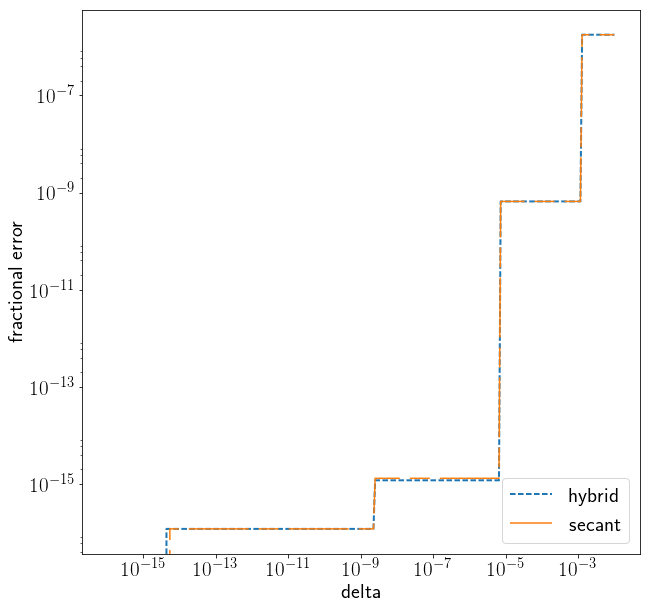

In [48]:
# plot the error of each method as a function of delta

import numpy as np
import matplotlib.pyplot as plt


x = delta_array
dashes = [10, 5, 100, 5]  # 10 points on, 5 off, 100 on, 5 off

plt.figure(figsize=(10,10))
plt.plot(x, err_hybrid, '--', linewidth=2, label='hybrid')
plt.plot(x, err_secant, dashes=[30, 5, 10, 5], label='secant')

plt.rc('text', usetex=True)
plt.rcParams.update({'font.size': 21})
plt.xlabel('delta')
plt.ylabel('fractional error')
#plt.title('fractional error for hybrid and secant methods')
plt.legend(loc='lower right')
plt.xscale('log')
plt.yscale('log')

plt.show()

In [50]:
# computes the machine's maximum precision

macheps = 1.0; verbose = False; 

while ((1.0 + (macheps/2.0)) != 1.0): # while computer can tell between 1 and 1+eps/2
    if verbose: 
        print("epsilon = %.16e , 1+epsilon = %.16e"%(macheps, 1.0+macheps))
    macheps /= 2. # keep dividing by 2

print("estimated precision of your machine is %.16e or %d bits"%(macheps, np.log2(1./macheps)+1))

estimated precision of your machine is 2.2204460492503131e-16 or 53 bits


According to the above, the hybrid method seems to be always one iteration faster than the secant method, but both estimate the root with good accuracy. Also, when calculating the fractional error, compared to the "actual" root $2+\sqrt{3}$, it seems that the maximum accuracy we can get is about $1.19 \times 10^{-16}$, which comes very close to the above estimated maximum precision of $2.22 \times 10^{-16}$ for this machine. More specifically, the figure above shows how the fractional error changes with different delta values. We can see that the error behaves almost like a step function, decreasing while delta also decreases. After some point when delta becomes of the order of $10^{-15}$ the error vanishes after it takes its minimum value which is of the order of $10^{-16}$ (which almost stays the same for delta's between $\sim 10^{-9} - 10^{-14}$). Thus, the maximum accuracy we can obtain is of the order of the maximum accuracy the machine can get, which is expected.



Exercise 3:



We want to find a root of the function
$$
g(x) = 1 + \frac{\gamma-1}{2a_L}\left[u_L-u_R -\frac{a_R}{\gamma}\frac{x-1}{\sqrt{\frac{\gamma+1}{2\gamma}(x-1)+1}} \right] - \left( \frac{p_R}{p_L} x \right)^{\frac{\gamma - 1}{2\gamma}}
$$
which we plot below.

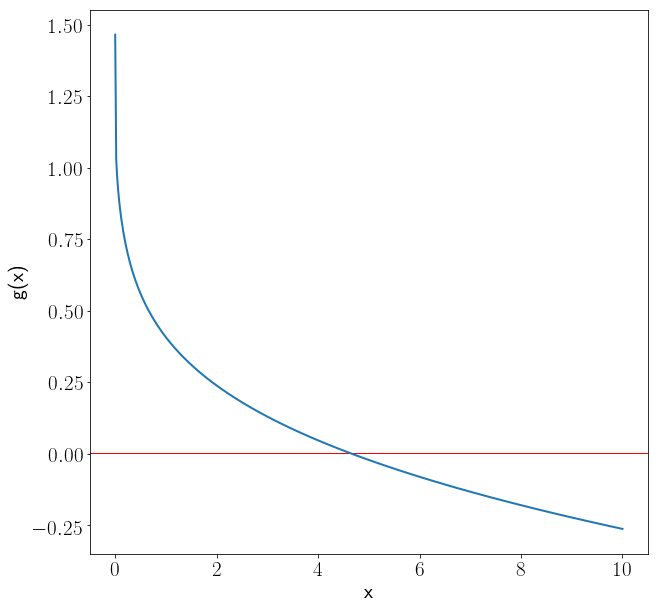

In [51]:
def g(x): # solving g(x)=0 is equivalent to solving the given equation
    # the parameters
    gamma = 1.4
    rhoL = 1.; rhoR = 0.125
    pL = 1.; pR = 0.1
    uL = 0.75; uR = 0.
    aL = np.sqrt(gamma*pL/rhoL); aR = np.sqrt(gamma*pR/rhoR)
    # 
    return 1. + ((gamma-1.)/(2.*aL))*(uL - uR - (aR/gamma)*(x-1.)/np.sqrt((gamma+1.)*(x-1.)/(2.*gamma) + 1.)) - ((pR/pL)*x)**((gamma-1.)/(2.*gamma))

# we now plot the above function to get an estimate of where the root is and define the interval that contains it
xplt = np.linspace(0, 10, 500)
dashes = [10, 5, 100, 5]  # 10 points on, 5 off, 100 on, 5 off

plt.figure(figsize=(10,10))
plt.plot(xplt, g(xplt), linewidth=2)
plt.axhline(y=0.002,xmin=0,xmax=3,c="red",linewidth=1,zorder=0) # plots horizontal red line
plt.rc('text', usetex=True)
plt.rcParams.update({'font.size': 21})
plt.xlabel('x')
plt.ylabel('g(x)')
#plt.title('fractional error for hybrid and secant methods')
plt.legend(loc='lower right')
plt.show()

From the figure above we can choose the interval [4,6] that includes the root and implment the hybrid method.

In [54]:
# we now use the hybrid method from above to find the root inside the chosen interval
a = 4.; b = 6.; delta = 1.e-6
xroot, niter = hybrid_root_find(g, a, b, delta)
print("The root is x = %.9f +- %.3e after n = %d iterations"%(xroot, delta, niter))

The root is x = 4.662935668 +- 1.000e-06 after n = 5 iterations
